In [2]:
library(plotly)
library(readr)
library(ggplot2)
library(reshape2)
library(gridExtra)
library(grid)
library(patchwork)


In [3]:
stats_results <- read_delim("stats_results.csv", 
                            "\t", escape_double = FALSE, locale = locale(), 
                            trim_ws = TRUE)
options(scipen=10000)
options(repr.plot.width=7 ,repr.plot.height=4)

Parsed with column specification:
cols(
  name = col_character(),
  id = col_double(),
  total_followers = col_integer(),
  total_following = col_integer(),
  total_posts = col_integer(),
  total_likes_sum = col_integer(),
  total_likes_mean = col_double(),
  total_likes_median = col_double(),
  total_retweets_sum = col_integer(),
  total_retweets_mean = col_double(),
  total_retweets_median = col_double(),
  total_replies_sum = col_integer(),
  total_replies_mean = col_double(),
  total_replies_median = col_double(),
  posts_count = col_integer()
)


# User Stats - Data Gathering and Analysis 

## Step 1 
A number n of tweets is requested to the Twitter User Timeline API. The Twitter API Access methods and data retrieval is provided by the python package birdy. In order to generate a request to the Twitter API, the users IDs and the number n of posts are provided to those methods.

As a result, a JSON file was generated for each user containing the n latest posts.

## Step 2

Due to the API limitations, the number of replies is not provided for each tweet. In order to bypass this limitation, the tweet page was scraped using the package Selenium. To handle the case where the content of the tweet page we want to crawl is being added to the page dinamicaly via JavaScript, we used the browser provided by this package to capture the source code after all the content is loaded.

After scraping each tweet page, a css file was created with all the users profile and tweets data and inputed into this notebook to generate the graphs.


# Tweets Sample
## Total Samples per user

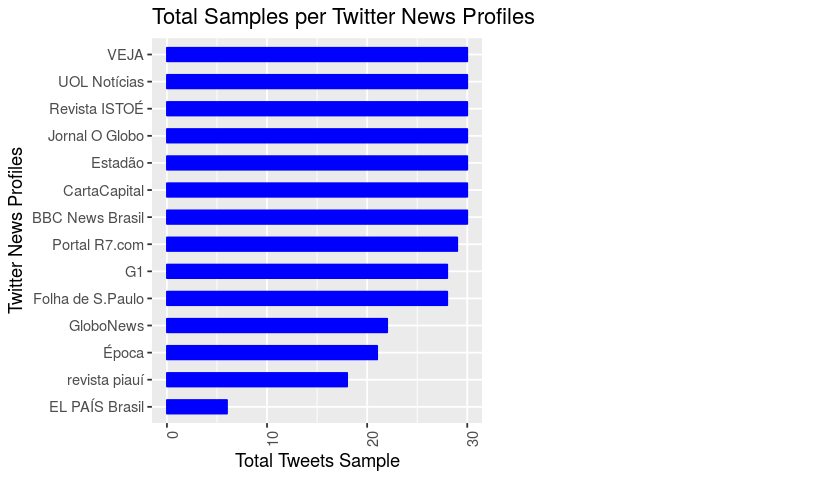

In [4]:
g1 <- ggplot(stats_results,aes(x = reorder(name,posts_count) ,y = posts_count)) + 
  geom_bar(stat = "identity", color="blue", fill="blue", width = 0.5) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x = "Twitter News Profiles", y = "Total Tweets Sample") + 
  ggtitle("Total Samples per Twitter News Profiles") +
  coord_flip()

g1 + plot_spacer()

## Profile Data
### Total tweets

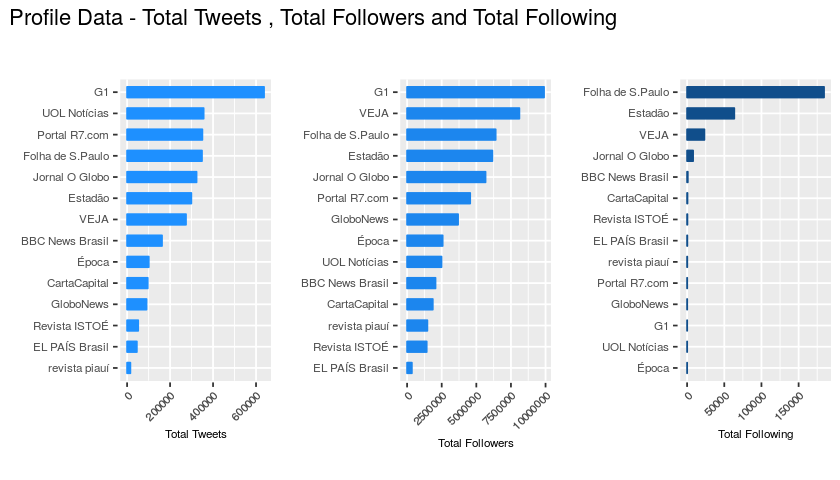

In [5]:
g1 <- ggplot(stats_results,aes(x = reorder(name,total_posts) ,y = total_posts)) + 
  geom_bar(stat = "identity", width = 0.5, color="dodgerblue", fill="dodgerblue") +
  coord_flip() + 
  labs(x = element_blank(), y = "Total Tweets") + 
  ggtitle(element_blank()) +
  theme(axis.text = element_text(size = 7))+
  theme(aspect.ratio = 2/1) + 
  theme(axis.title = element_text(size = 7)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

g2 <- ggplot(stats_results,aes(x = reorder(name,total_followers) ,y = total_followers)) + 
    geom_bar(stat = "identity", width = 0.5, color="dodgerblue2", fill="dodgerblue2") +
    coord_flip() + 
    labs(x = element_blank(), y = "Total Followers") + 
    ggtitle(element_blank()) +
    theme(axis.text = element_text(size = 7)) +
    theme(aspect.ratio = 2/1)+ 
    theme(axis.title = element_text(size = 7))  +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

g3 <- ggplot(stats_results,aes(x = reorder(name,total_following) ,y = total_following)) + 
  geom_bar(stat = "identity", width = 0.5 , color="dodgerblue4", fill="dodgerblue4") +
  coord_flip() + 
  labs(x = element_blank(), y = "Total Following") + 
  ggtitle(element_blank()) +
  theme(axis.text = element_text(size = 7)) +
  theme(aspect.ratio = 2/1)+ 
  theme(axis.title = element_text(size = 7)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#grid.arrange(g1, g2, g3, ncol=3, top = textGrob("Profile Data - Total Tweets, Followers, Following"), left= textGrob("User Profiles"))
g1 + g2 + g3 + plot_annotation(title="Profile Data - Total Tweets , Total Followers and Total Following")




## Tweets Data - Likes

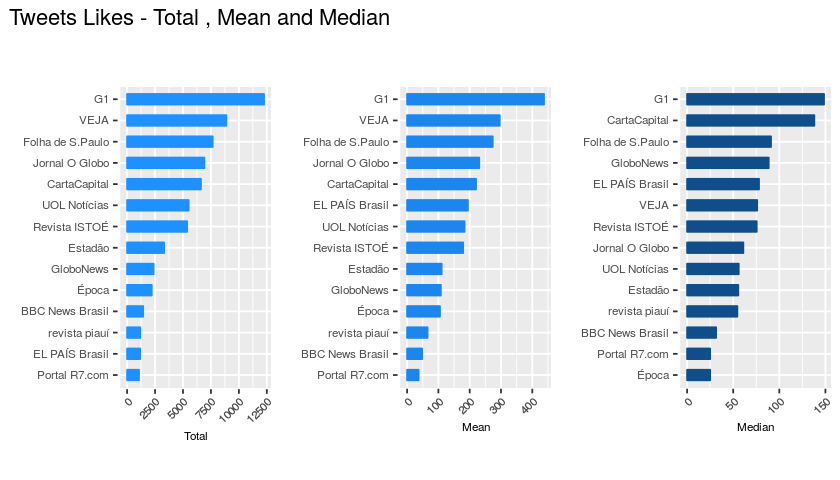

In [6]:



g1 <- ggplot(stats_results,aes(x = reorder(name,total_likes_sum) ,y = total_likes_sum)) + 
  geom_bar(stat = "identity", width = 0.5, color="dodgerblue", fill="dodgerblue") +
  coord_flip() + 
  labs(x = element_blank(), y = "Total") + 
  ggtitle(element_blank()) +
  theme(axis.text = element_text(size = 7))+
  theme(aspect.ratio = 2/1) + 
  theme(axis.title = element_text(size = 7)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

g2 <- ggplot(stats_results,aes(x = reorder(name,total_likes_mean) ,y = total_likes_mean)) + 
    geom_bar(stat = "identity", width = 0.5, color="dodgerblue2", fill="dodgerblue2") +
    coord_flip() + 
    labs(x = element_blank(), y = "Mean") + 
    ggtitle(element_blank()) +
    theme(axis.text = element_text(size = 7)) +
    theme(aspect.ratio = 2/1)+ 
    theme(axis.title = element_text(size = 7))  +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

g3 <- ggplot(stats_results,aes(x = reorder(name,total_likes_median) ,y = total_likes_median)) + 
  geom_bar(stat = "identity", width = 0.5 , color="dodgerblue4", fill="dodgerblue4") +
  coord_flip() + 
  labs(x = element_blank(), y = "Median") + 
  ggtitle(element_blank()) +
  theme(axis.text = element_text(size = 7)) +
  theme(aspect.ratio = 2/1)+ 
  theme(axis.title = element_text(size = 7)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


g1 + g2 + g3 + plot_annotation(title="Tweets Likes - Total , Mean and Median")





### Tweets Data - Retweets


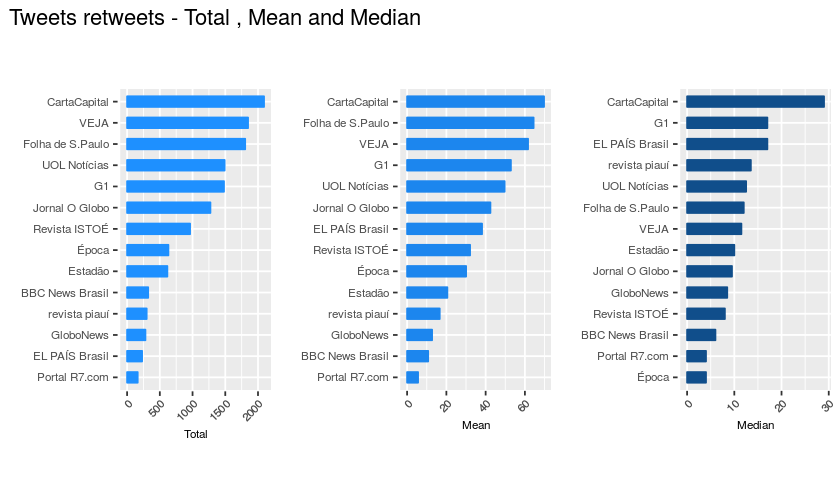

In [7]:



g1 <- ggplot(stats_results,aes(x = reorder(name,total_retweets_sum) ,y = total_retweets_sum)) + 
  geom_bar(stat = "identity", width = 0.5, color="dodgerblue", fill="dodgerblue") +
  coord_flip() + 
  labs(x = element_blank(), y = "Total") + 
  ggtitle(element_blank()) +
  theme(axis.text = element_text(size = 7))+
  theme(aspect.ratio = 2/1) + 
  theme(axis.title = element_text(size = 7)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

g2 <- ggplot(stats_results,aes(x = reorder(name,total_retweets_mean) ,y = total_retweets_mean)) + 
    geom_bar(stat = "identity", width = 0.5, color="dodgerblue2", fill="dodgerblue2") +
    coord_flip() + 
    labs(x = element_blank(), y = "Mean") + 
    ggtitle(element_blank()) +
    theme(axis.text = element_text(size = 7)) +
    theme(aspect.ratio = 2/1)+ 
    theme(axis.title = element_text(size = 7))  +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

g3 <- ggplot(stats_results,aes(x = reorder(name,total_retweets_median) ,y = total_retweets_median)) + 
  geom_bar(stat = "identity", width = 0.5 , color="dodgerblue4", fill="dodgerblue4") +
  coord_flip() + 
  labs(x = element_blank(), y = "Median") + 
  ggtitle(element_blank()) +
  theme(axis.text = element_text(size = 7)) +
  theme(aspect.ratio = 2/1)+ 
  theme(axis.title = element_text(size = 7)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


g1 + g2 + g3 + plot_annotation(title="Tweets retweets - Total , Mean and Median")





### Tweets Data - Replies

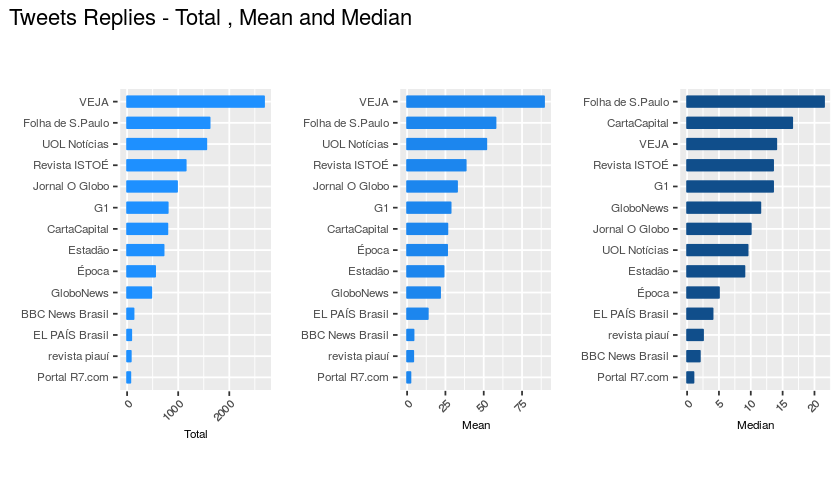

In [8]:
g1 <- ggplot(stats_results,aes(x = reorder(name,total_replies_sum) ,y = total_replies_sum)) + 
  geom_bar(stat = "identity", width = 0.5, color="dodgerblue", fill="dodgerblue") +
  coord_flip() + 
  labs(x = element_blank(), y = "Total") + 
  ggtitle(element_blank()) +
  theme(axis.text = element_text(size = 7))+
  theme(aspect.ratio = 2/1) + 
  theme(axis.title = element_text(size = 7)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

g2 <- ggplot(stats_results,aes(x = reorder(name,total_replies_mean) ,y = total_replies_mean)) + 
    geom_bar(stat = "identity", width = 0.5, color="dodgerblue2", fill="dodgerblue2") +
    coord_flip() + 
    labs(x = element_blank(), y = "Mean") + 
    ggtitle(element_blank()) +
    theme(axis.text = element_text(size = 7)) +
    theme(aspect.ratio = 2/1)+ 
    theme(axis.title = element_text(size = 7))  +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

g3 <- ggplot(stats_results,aes(x = reorder(name,total_replies_median) ,y = total_replies_median)) + 
  geom_bar(stat = "identity", width = 0.5 , color="dodgerblue4", fill="dodgerblue4") +
  coord_flip() + 
  labs(x = element_blank(), y = "Median") + 
  ggtitle(element_blank()) +
  theme(axis.text = element_text(size = 7)) +
  theme(aspect.ratio = 2/1)+ 
  theme(axis.title = element_text(size = 7)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


g1 + g2 + g3 + plot_annotation(title="Tweets Replies - Total , Mean and Median")





### Tweets Data - Engagement (replies + retweets + likes) /3

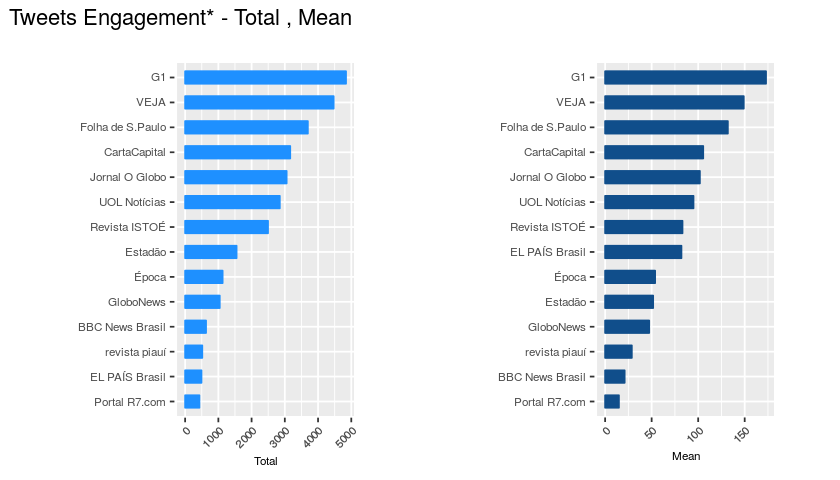

In [9]:
stats_results['total_eng'] <- (stats_results$total_likes_sum + 
                              stats_results$total_retweets_sum + 
                              stats_results$total_replies_sum  )/3

stats_results['total_eng_mean'] <- stats_results$total_eng/stats_results$posts_count


g1 <- ggplot(stats_results,aes(x = reorder(name,total_eng) ,y = total_eng)) + 
  geom_bar(stat = "identity", width = 0.5, color="dodgerblue", fill="dodgerblue") +
  coord_flip() + 
  labs(x = element_blank(), y = "Total") + 
  ggtitle(element_blank()) +
  theme(axis.text = element_text(size = 7))+
  theme(aspect.ratio = 2/1) + 
  theme(axis.title = element_text(size = 7)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

g2 <- ggplot(stats_results,aes(x = reorder(name,total_eng_mean) ,y = total_eng_mean)) + 
    geom_bar(stat = "identity", width = 0.5, color="dodgerblue4", fill="dodgerblue4") +
    coord_flip() + 
    labs(x = element_blank(), y = "Mean") + 
    ggtitle(element_blank()) +
    theme(axis.text = element_text(size = 7)) +
    theme(aspect.ratio = 2/1)+ 
    theme(axis.title = element_text(size = 7))  +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

g1 + g2 + plot_annotation(title="Tweets Engagement* - Total , Mean")

